In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

## Collection et analyse des données

In [245]:
#charger les données du fichier csv vers un DataFrame Pandas
parkinsons_data = pd.read_csv('parkinsons.csv')

In [246]:
# afficher les 5 premières lignes de notre dataframe
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [247]:
#Nombre de lignes et de colonnes de notre dataframe.
parkinsons_data.shape

(195, 24)

In [248]:
#obtenir plus d'informations sur l'ensemble de données
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [249]:
#vérification des valeurs manquantes dans chaque colonne
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [250]:
# obtenir des mesures statistiques sur les données
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [251]:
#la distribution de la Variable cible (etiquette)
parkinsons_data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [252]:
#regroupement des données en fonction de la variable cible
parkinsons_data.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


## Prétraitement des données

In [253]:
X = parkinsons_data.drop(columns=['name','status'], axis=1)
Y = parkinsons_data['status']

In [254]:
X

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [255]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

In [256]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [257]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


In [258]:
scaler = StandardScaler()

In [259]:
scaler.fit(X_train)

StandardScaler()

In [260]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [261]:
print(X_train)

[[ 0.63239631 -0.02731081 -0.87985049 ... -0.97586547 -0.55160318
   0.07769494]
 [-1.05512719 -0.83337041 -0.9284778  ...  0.3981808  -0.61014073
   0.39291782]
 [ 0.02996187 -0.29531068 -1.12211107 ... -0.43937044 -0.62849605
  -0.50948408]
 ...
 [-0.9096785  -0.6637302  -0.160638   ...  1.22001022 -0.47404629
  -0.2159482 ]
 [-0.35977689  0.19731822 -0.79063679 ... -0.17896029 -0.47272835
   0.28181221]
 [ 1.01957066  0.19922317 -0.61914972 ... -0.716232    1.23632066
  -0.05829386]]


## ENTRAINEMENT Des modèles

### Support Vector Machine Model

In [262]:
model = svm.SVC(kernel='linear')

In [263]:
#entrainement du modèle SVM avec les données d'entrainement
model.fit(X_train, Y_train)

SVC(kernel='linear')

### XGBoost model

In [264]:
xgb_model = XGBClassifier()

In [265]:
xgb_model.fit(X_train, Y_train)

[00:19:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### DecisionTree model

In [266]:
tree_model = DecisionTreeClassifier()

In [267]:
tree_model.fit(X_train, Y_train)

DecisionTreeClassifier()

### Random Forest model

In [268]:
forest_model = RandomForestClassifier(n_estimators=100)

In [269]:
forest_model.fit(X_train, Y_train)

RandomForestClassifier()

## Évaluation des modèles

In [270]:
liste=[model,xgb_model,tree_model,forest_model]
nom=["support vector machine","XGBOOST","Decision Tree","Random Forest"]

In [271]:
# accuracy score des données d'entrainement
for i in range(len(liste)):
    X_train_prediction = liste[i].predict(X_train)
    training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
    print("le taux de réussite par rapport aux données d'entrainement de",nom[i],"model est: ", training_data_accuracy)

le taux de réussite par rapport aux données d'entrainement de support vector machine model est:  0.8846153846153846
le taux de réussite par rapport aux données d'entrainement de XGBOOST model est:  1.0
le taux de réussite par rapport aux données d'entrainement de Decision Tree model est:  1.0
le taux de réussite par rapport aux données d'entrainement de Random Forest model est:  1.0


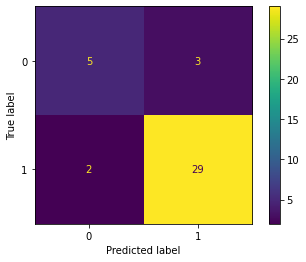

le taux de réussite de support vector machine model est:  0.8717948717948718
le précision de support vector machine model est:  0.8102678571428572
le rappel de support vector machine model est:  0.780241935483871


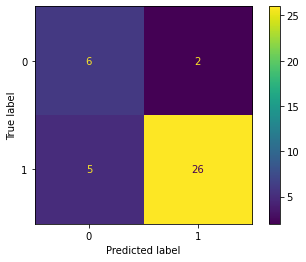

le taux de réussite de XGBOOST model est:  0.8205128205128205
le précision de XGBOOST model est:  0.737012987012987
le rappel de XGBOOST model est:  0.7943548387096775


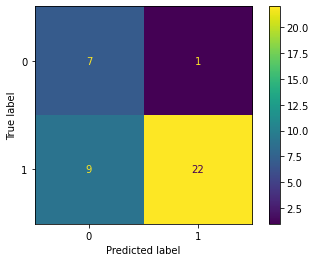

le taux de réussite de Decision Tree model est:  0.7435897435897436
le précision de Decision Tree model est:  0.6970108695652174
le rappel de Decision Tree model est:  0.7923387096774194


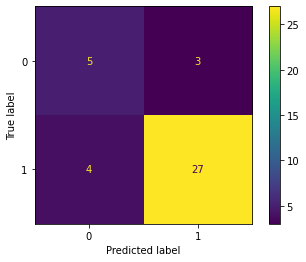

le taux de réussite de Random Forest model est:  0.8205128205128205
le précision de Random Forest model est:  0.7277777777777779
le rappel de Random Forest model est:  0.747983870967742


In [272]:
# accuracy score des données test
for i in range(len(liste)):
    X_test_prediction = liste[i].predict(X_test)
    cm=confusion_matrix(Y_test,X_test_prediction)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
    precision=precision_score(Y_test, X_test_prediction, average='macro')
    recall=recall_score(Y_test, X_test_prediction, average='macro')
    print("le taux de réussite de",nom[i],"model est: ", test_data_accuracy)
    print("le précision de",nom[i],"model est: ", precision)
    print("le rappel de",nom[i],"model est: ", recall)

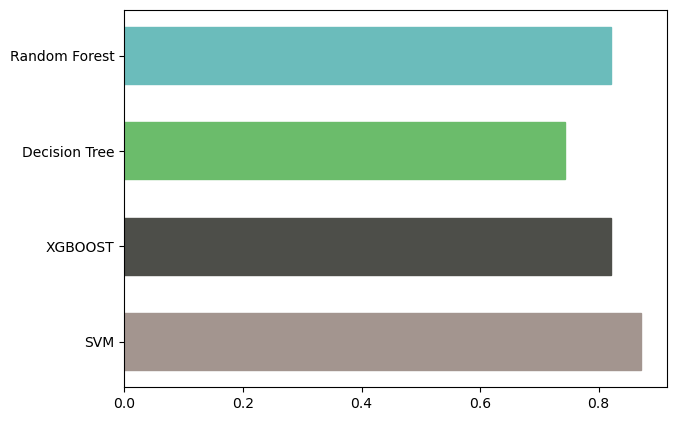

In [274]:
plt.figure(figsize=(7,5),dpi=100)
#plt.title("ACCURACY DE CHAQUE MODELE",fontdict={"fontname":"Comic Sans MS",'fontsize':20})
accuracyListe=[]
precisionListe=[]
recallListe=[]
for i in range(len(liste)):
    X_test_prediction = liste[i].predict(X_test)
    test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
    precision=precision_score(Y_test, X_test_prediction, average='macro')
    recall=recall_score(Y_test, X_test_prediction, average='macro')
    accuracyListe.append(test_data_accuracy)
    precisionListe.append(precision)
    recallListe.append(recall)
    
labels=["SVM","XGBOOST","Decision Tree","Random Forest"]
bars=plt.barh(labels,accuracyListe,color="green",height = 0.6)
'''patterns=["/","*","O"]
for i in range(len(patterns)):
    bars[i].set_hatch(patterns[i])'''
bars[0].set_color("#A3958F")
bars[1].set_color("#4D4E49")
bars[2].set_color("#6BBC6B")
bars[3].set_color("#6BBCBB")
#plt.yticks([0.2,accuracyListe[1],accuracyListe[2],accuracyListe[3]])
plt.show()

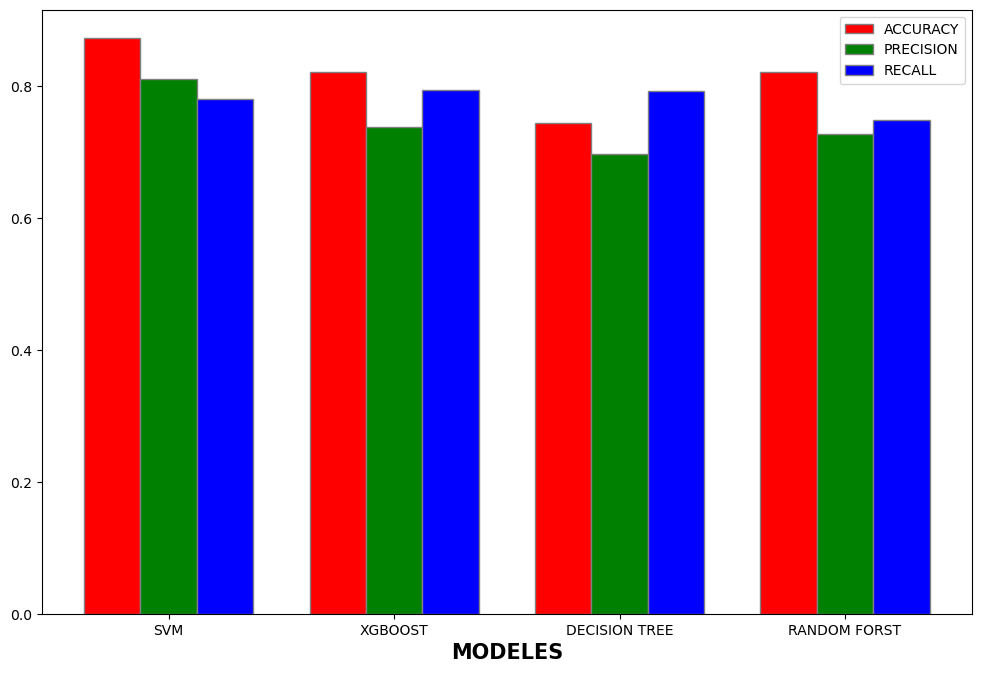

In [275]:
plt.figure(figsize=(12,8),dpi=100)
# Set position of bar on X axis
br1 = np.arange(len(accuracyListe))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, accuracyListe, color ='r', width = barWidth,
        edgecolor ='grey', label ='ACCURACY')
plt.bar(br2, precisionListe, color ='g', width = barWidth,
        edgecolor ='grey', label ='PRECISION')
plt.bar(br3, recallListe, color ='b', width = barWidth,
        edgecolor ='grey', label ='RECALL')
 
# Adding Xticks
plt.xlabel('MODELES', fontweight ='bold', fontsize = 15)
#plt.ylabel('Students passed', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(accuracyListe))],
            ['SVM', 'XGBOOST', 'DECISION TREE', 'RANDOM FORST'])
 
plt.legend()
plt.savefig('mygraph.png',dpi=300)
plt.show()

## Construire un système prédictif

In [273]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

#changer les données d'entrée en un tableau numpy
input_data_as_numpy_array = np.asarray(input_data)

# reformer le tableau numpy
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# normaliser les données
std_data = scaler.transform(input_data_reshaped)

for i in range(4):
    predictions[i]=liste[i].predict(std_data)
    print('pour',nom[i],'model')
    if (predictions[0] == 0):
        print("La personne n'est pas atteinte de la maladie de Parkinson",'\n')
    else:
        print("La personne est atteinte de la maladie de Parkinson",'\n')


pour support vector machine model
La personne n'est pas atteinte de la maladie de Parkinson 

pour XGBOOST model
La personne n'est pas atteinte de la maladie de Parkinson 

pour Decision Tree model
La personne n'est pas atteinte de la maladie de Parkinson 

pour Random Forest model
La personne n'est pas atteinte de la maladie de Parkinson 

